In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Avoid SettingWithCopyWarning
pd.options.mode.copy_on_write = True

# Data Preparation

This dataset is from the U.S. Department of Education College Scorecard: https://collegescorecard.ed.gov/data/. The College Scorecard project is designed to increase transparency, putting the power in the hands of
students and families to compare how well individual postsecondary institutions are preparing their
students to be successful. This data was provided to help students and families compare college costs
and outcomes as they weigh the tradeoffs of different colleges, accounting for their own needs and
educational goals. 

The data contains real records of institutional data with over 6400 observations.

In [55]:
# Loading up the dataset and setting the datatype of "OPEID" and "OPEID6" column to string
institution_data = pd.read_csv('../data/Most-Recent-Cohorts-Institution.csv', dtype={"OPEID": str, "OPEID6": str}, low_memory=False)

In [56]:
# Make a copy of the original dataset
institution_data_orig = institution_data.copy()

## 1. Initial inspection

In [100]:
# Inspect the dataframe
institution_data

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,...,BBRR4_PP_MALE_PAIDINFULL,BBRR4_PP_MALE_DISCHARGE,BBRR4_PP_NOMALE_N,BBRR4_PP_NOMALE_DFLT,BBRR4_PP_NOMALE_DLNQ,BBRR4_PP_NOMALE_FBR,BBRR4_PP_NOMALE_DFR,BBRR4_PP_NOMALE_PAIDINFULL,BBRR4_PP_NOMALE_DISCHARGE,CONTROL_PEPS
0,100654,00100200,001002,Alabama A & M University,Normal,AL,1,1,3,4,...,<=0.05,0.05-0.09,429,0.15-0.19,<=0.05,0.50-0.54,0.10-0.14,<=0.05,0.05-0.09,Public
1,100663,00105200,001052,University of Alabama at Birmingham,Birmingham,AL,1,1,3,4,...,0.10-0.19,<=0.10,402,<=0.10,<=0.10,0.40-0.49,0.10-0.19,0.10-0.19,<=0.10,Public
2,100690,02503400,025034,Amridge University,Montgomery,AL,1,1,3,4,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,Private Nonprofit
3,100706,00105500,001055,University of Alabama in Huntsville,Huntsville,AL,1,1,3,4,...,0.20-0.29,<=0.10,127,0.10-0.19,<=0.10,0.40-0.49,<=0.10,0.10-0.19,<=0.10,Public
4,100724,00100500,001005,Alabama State University,Montgomery,AL,1,1,3,4,...,<=0.05,0.05-0.09,500,0.20-0.24,<=0.05,0.45-0.49,0.10-0.14,<=0.05,0.05-0.09,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,49178301,04270802,042708,Wilton Simpson Technical College,Brooksville,FL,0,2,0,0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,Public
6480,49425001,02609404,026094,Valley College - Fairlawn - School of Nursing,Fairlawn,OH,0,3,0,0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,Proprietary
6481,49501301,04247201,042472,Western Maricopa Education Center - Southwest ...,Buckeye,AZ,0,3,0,0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,Public
6482,49501302,04247202,042472,Western Maricopa Education Center - Northeast ...,Phoenix,AZ,0,3,0,0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,Public


In [102]:
# Check the dimensions of the DataFrame
institution_data.shape

(6484, 880)

In [104]:
# Info about dimensions and data types of columns
institution_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6484 entries, 0 to 6483
Columns: 880 entries, UNITID to CONTROL_PEPS
dtypes: float64(141), int64(9), object(730)
memory usage: 43.5+ MB


In [106]:
# Summary statistics
institution_data.describe()

,UNITID,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,REGION,LATITUDE,LONGITUDE,CCUGPROF,...,IRPS_AIAN,IRPS_ASIAN,IRPS_BLACK,IRPS_HISP,IRPS_NHPI,IRPS_NRA,IRPS_UNKN,IRPS_WHITE,IRPS_MEN,MD_EARN_WNE_1YR
count,6.484000e+03,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,5989.000000,5989.000000,5989.000000,...,5744.000000,5744.000000,5744.000000,5744.000000,5744.000000,5744.000000,5744.000000,5744.000000,5744.000000,5663.000000
mean,2.261726e+06,0.788865,3.191703,1.836212,2.247224,2.057989,4.642813,37.268949,-90.458217,3.551678,...,0.007545,0.054904,0.123331,0.105119,0.003058,0.011444,0.023842,0.654294,0.415340,37064.581317
std,7.805306e+06,0.408146,6.809394,1.084154,1.381255,0.832232,2.180387,5.868160,18.186532,5.639102,...,0.048297,0.115586,0.218736,0.217060,0.029454,0.040482,0.072858,0.305924,0.267436,16276.698304
min,1.006540e+05,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-14.322636,-170.742774,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5147.000000
25%,1.742222e+05,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,33.917330,-97.541242,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.235300,24761.000000
50%,2.288965e+05,1.000000,1.000000,2.000000,2.000000,2.000000,5.000000,38.631435,-86.267098,1.000000,...,0.000000,0.007800,0.035750,0.023700,0.000000,0.000000,0.000000,0.742050,0.446600,36453.000000
75%,4.576172e+05,1.000000,2.000000,3.000000,4.000000,3.000000,6.000000,41.250851,-78.876532,10.000000,...,0.000000,0.071475,0.122000,0.081150,0.000000,0.000000,0.015400,0.888900,0.545500,45557.500000
max,4.966450e+07,1.000000,52.000000,4.000000,4.000000,3.000000,9.000000,71.324702,171.378129,15.000000,...,1.000000,1.000000,1.000000,1.000000,0.877600,1.000000,1.000000,1.000000,1.000000,125246.000000


In [108]:
# Data types of columns
institution_data.dtypes

UNITID                         int64
OPEID                         object
OPEID6                        object
INSTNM                        object
CITY                          object
                               ...  
BBRR4_PP_NOMALE_FBR           object
BBRR4_PP_NOMALE_DFR           object
BBRR4_PP_NOMALE_PAIDINFULL    object
BBRR4_PP_NOMALE_DISCHARGE     object
CONTROL_PEPS                  object
Length: 880, dtype: object

## 2. Selecting / removing columns

In [112]:
# Removing unnecessary variables

institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("POOL", case=False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("3YR", case=False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("4YR", case=False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("5YR", case=False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("YR2", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("YR3", case=False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("YR4", case=False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("YR6", case=False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("YR8", case=False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("DBRR", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("PLUS", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("OMEN", case = False) | institution_data.columns.str.contains("WOMENONLY", case=False) |
                            institution_data.columns.str.contains("UGDS_WOMEN", case=False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("OMAW", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("GT", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("DCS", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("MID", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("25", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("75", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("P6", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("P7", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("P8", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("P9", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("P11", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("SUPP", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("PROG", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("OTHER", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("PCIP", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("CIP", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("ACCRED", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("LOCALE", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("MTHCMP", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("SD", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("CDR", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("CNTOVER", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("OTHEREXPENSE", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("LPSTAFFORD", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("12MN", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("URL", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("D150", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("D200", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("C200", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("D100", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("DTRANS", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("RPY", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("REPAY", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("SEPAR", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("APPL_SCH_PCT", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("FSEND", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("OMACHT", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("048", case = False)]
institution_data = institution_data.loc[:, ~institution_data.columns.str.contains("CUML_DEBT", case = False)]



institution_data = institution_data.drop(columns=["ZIP", "SCH_DEG", "SCHTYPE", "HCM2", "CCBASIC", "UG", "PPTUG_EF2", "PFTFTUG1_EF", "ST_FIPS", "COUNT_ED", "AGE_ENTRY_SQ",
                                      "GRAD_DEBT_MDN10YR", "DEP_STAT_N", "PAR_ED_N", "APPL_SCH_N", "D_PCTPELL_PCTFLOAN", "T4APPROVALDATE", "UGNONDS", "OPEFLAG", "FEDSCHCD",
                                      "DOLPROVIDER", "MDCOMP_ALL", "MDCOST_ALL", "MDEARN_ALL", "UG_NRA", "UG_UNKN", "UG_WHITENH", "UG_BLACKNH", "UG_API",
                                      "UG_AIANOLD", "UG_HISPOLD", "UGDS_WHITENH", "UGDS_BLACKNH", "UGDS_API",
                                      "UGDS_AIANOLD", "UGDS_HISPOLD", "C150_4_WHITENH", "C150_4_BLACKNH", "C150_4_API", "C150_4_AIANOLD", "C150_4_HISPOLD", "C150_L4_WHITENH",
                                      "C150_L4_BLACKNH", "C150_L4_API", "C150_L4_AIANOLD", "C150_L4_HISPOLD", "MN_EARN_WNE_INDEP0_INC1_P10", "MN_EARN_WNE_INDEP1_P10",
                                      "MN_EARN_WNE_INDEP0_P10", "MN_EARN_WNE_INC1_P10", "MN_EARN_WNE_INC2_P10", "MN_EARN_WNE_INC3_P10", "MD_EARN_WNE_INC1_P10",
                                      "MD_EARN_WNE_INC2_P10", "MD_EARN_WNE_INC3_P10", "COUNT_WNE_INDEP0_P10", "COUNT_WNE_INDEP0_INC1_P10", "ADDR", "SATVR50", "SATMT50",
                                      "ACTCM50", "ACTEN50", "ACTMT50", "PRGMOFR", "PCT10_EARN_WNE_P10", "PCT90_EARN_WNE_P10", "COUNT_WNE_INDEP1_P10"], errors="ignore")


We have 3305 entries, most of which are object datatypes. We know that most of these entries are not important for our research, so we'll start removing unwanted entries.

In [132]:
data = institution_data

## Histogram of each school types (HBCU, PBI, ANNHI, TRIBAL, AANAPII, HSI, NANTI)

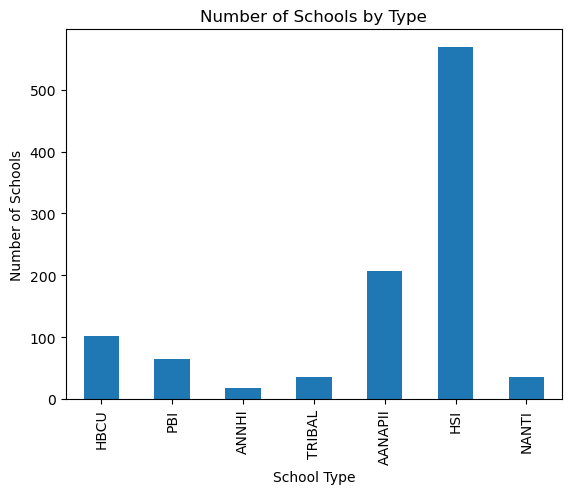

In [136]:
school_types = ['HBCU', 'PBI', 'ANNHI', 'TRIBAL', 'AANAPII', 'HSI', 'NANTI']
school_sums = data[school_types].fillna(0).sum()
school_sums.plot(kind='bar')
plt.xlabel('School Type')
plt.ylabel('Number of Schools')
plt.title('Number of Schools by Type')
plt.show()

In [138]:
print(school_sums)

HBCU       101.0
PBI         64.0
ANNHI       18.0
TRIBAL      35.0
AANAPII    207.0
HSI        569.0
NANTI       36.0
dtype: float64


## Plotting the distribution of black undergraduate students

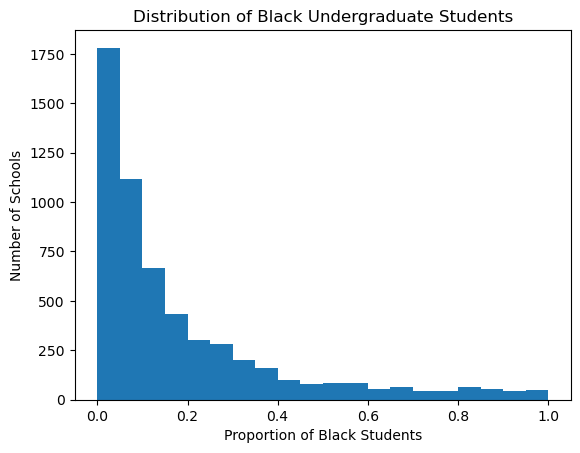

In [157]:
plt.hist(data['UGDS_BLACK'], bins=20)
plt.xlabel('Proportion of Black Students')
plt.ylabel('Number of Schools')
plt.title('Distribution of Black Undergraduate Students')
plt.show()

## Plotting the distribution of black undergraduate students in HBCU and PBI

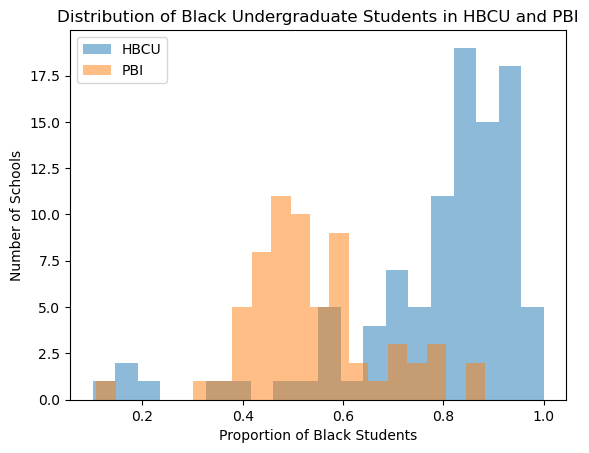

In [159]:
plt.hist(data[data['HBCU'] == 1]['UGDS_BLACK'], bins=20, alpha=0.5, label='HBCU')
plt.hist(data[data['PBI'] == 1]['UGDS_BLACK'], bins=20, alpha=0.5, label='PBI')
plt.xlabel('Proportion of Black Students')
plt.ylabel('Number of Schools')
plt.title('Distribution of Black Undergraduate Students in HBCU and PBI')
plt.legend()
plt.show()

## Plotting Admission Rates vs Average SAT Score (HBCU & PBI)

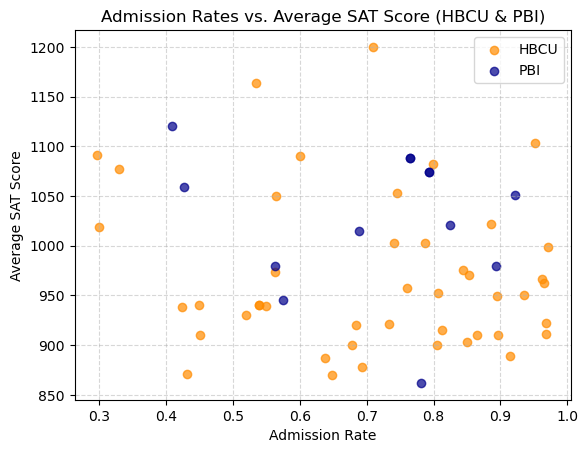

In [161]:
plt.scatter(data[data['HBCU'] == 1]['ADM_RATE_ALL'],
            data[data['HBCU'] == 1]['SAT_AVG_ALL'],
            color='darkorange', label='HBCU', alpha=0.7)

plt.scatter(data[data['PBI'] == 1]['ADM_RATE_ALL'],
            data[data['PBI'] == 1]['SAT_AVG_ALL'],
            color='darkblue', label='PBI', alpha=0.7)

plt.xlabel('Admission Rate')
plt.ylabel('Average SAT Score')
plt.title('Admission Rates vs. Average SAT Score (HBCU & PBI)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

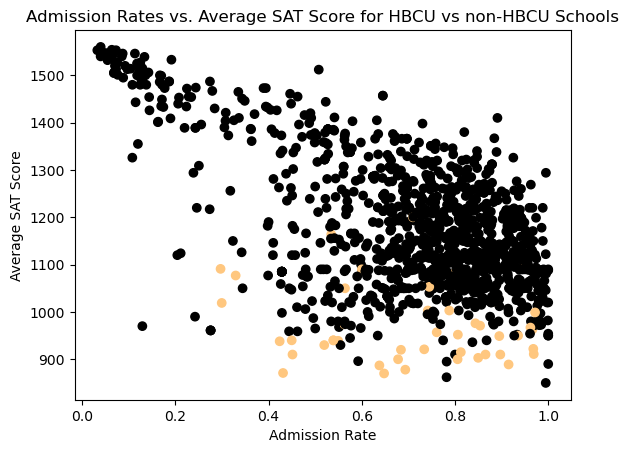

In [163]:
plt.scatter(data['ADM_RATE_ALL'], data['SAT_AVG_ALL'], c=data['HBCU'], cmap='copper')
plt.xlabel('Admission Rate')
plt.ylabel('Average SAT Score')
plt.title('Admission Rates vs. Average SAT Score for HBCU vs non-HBCU Schools')
plt.show()

## Average Cost of Attendance for HBCU vs non-HBCU

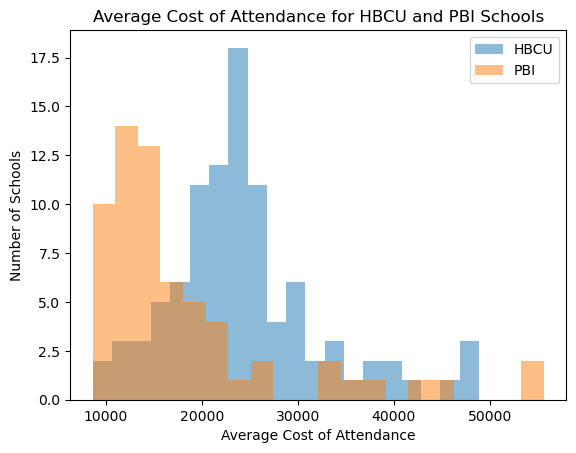

In [165]:
plt.hist(data[data['HBCU'] == 1]['COSTT4_A'], bins=20, alpha=0.5, label='HBCU')
plt.hist(data[data['PBI'] == 1]['COSTT4_A'], bins=20, alpha=0.5, label='PBI')
plt.xlabel('Average Cost of Attendance')
plt.ylabel('Number of Schools')
plt.title('Average Cost of Attendance for HBCU and PBI Schools')
plt.legend()
plt.show()

## Plotting Net Tuition Revenue per full-time student at HBCU and PBI

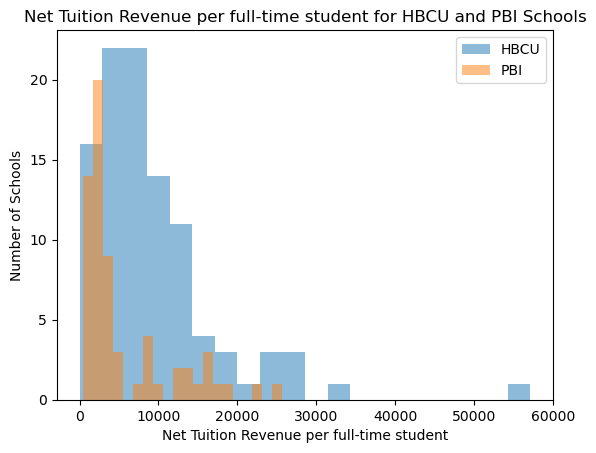

In [ ]:
plt.hist(data[data['HBCU'] == 1]['TUITFTE'].fillna(0), bins=20, alpha=0.5, label='HBCU')
plt.hist(data[data['PBI'] == 1]['TUITFTE'].fillna(0), bins=20, alpha=0.5, label='PBI')
plt.xlabel('Net Tuition Revenue per full-time student')
plt.ylabel('Number of Schools')
plt.title('Net Tuition Revenue per full-time student for HBCU and PBI Schools')
plt.legend()
plt.show()